## Dataset: [Face Mask Detection](https://www.kaggle.com/andrewmvd/face-mask-detection)

In [1]:
# copy image files
import os
os.environ["KAGGLE_CONFIG_DIR"]='/content'
!kaggle datasets download -d andrewmvd/face-mask-detection
!unzip \*.zip && rm *.zip

 96% 383M/398M [00:02<00:00, 137MB/s]
100% 398M/398M [00:03<00:00, 136MB/s]
Archive:  face-mask-detection.zip
  inflating: annotations/maksssksksss0.xml  
  inflating: annotations/maksssksksss1.xml  
  inflating: annotations/maksssksksss10.xml  
  inflating: annotations/maksssksksss100.xml  
  inflating: annotations/maksssksksss101.xml  
  inflating: annotations/maksssksksss102.xml  
  inflating: annotations/maksssksksss103.xml  
  inflating: annotations/maksssksksss104.xml  
  inflating: annotations/maksssksksss105.xml  
  inflating: annotations/maksssksksss106.xml  
  inflating: annotations/maksssksksss107.xml  
  inflating: annotations/maksssksksss108.xml  
  inflating: annotations/maksssksksss109.xml  
  inflating: annotations/maksssksksss11.xml  
  inflating: annotations/maksssksksss110.xml  
  inflating: annotations/maksssksksss111.xml  
  inflating: annotations/maksssksksss112.xml  
  inflating: annotations/maksssksksss113.xml  
  inflating: annotations/maksssksksss114.xml  
  i

In [2]:
!git clone https://github.com/rkuo2000/yolov5
%cd yolov5

Cloning into 'yolov5'...
remote: Enumerating objects: 3390, done.
remote: Total 3390 (delta 0), reused 0 (delta 0), pack-reused 3390
Receiving objects: 100% (3390/3390), 7.02 MiB | 27.86 MiB/s, done.
Resolving deltas: 100% (2273/2273), done.
/content/yolov5


## Repro [YOLOv5](https://github.com/ultralytics/yolov5)

In [3]:
!mkdir -p Dataset/FaceMask/Images
!mkdir -p Dataset/FaceMask/Labels

In [4]:
!cp -rf /content/images/* Dataset/FaceMask/Images

In [5]:
!mkdir -p Dataset/images Dataset/labels

## Create Dataset

In [6]:
import numpy as np
from pathlib import Path
from xml.dom.minidom import parse
from shutil import copyfile

In [7]:
FILE_ROOT = "/content/"
IMAGE_PATH = FILE_ROOT + "images"  
ANNOTATIONS_PATH = FILE_ROOT + "annotations"

DATA_ROOT = "Dataset/"
LABELS_ROOT = DATA_ROOT + "FaceMask/Labels"
IMAGES_ROOT = DATA_ROOT + "FaceMask/Images"  

DEST_IMAGES_PATH = "images"
DEST_LABELS_PATH = "labels" 

In [8]:
classes = ['with_mask', 'without_mask', 'mask_weared_incorrect']

### convert annotations (from COCO .xml to YOLO format .txt)

In [9]:
def cord_converter(size, box):
    """
    convert xml annotation to darknet format coordinates
    :param size： [w,h]
    :param box: anchor box coordinates [upper-left x,uppler-left y,lower-right x, lower-right y]
    :return: converted [x,y,w,h]
    """
    x1 = int(box[0])
    y1 = int(box[1])
    x2 = int(box[2])
    y2 = int(box[3])

    dw = np.float32(1. / int(size[0]))
    dh = np.float32(1. / int(size[1]))

    w = x2 - x1
    h = y2 - y1
    x = x1 + (w / 2)
    y = y1 + (h / 2)

    x = x * dw
    w = w * dw
    y = y * dh
    h = h * dh
    return [x, y, w, h]

def save_file(img_jpg_file_name, size, img_box):
    save_file_name = LABELS_ROOT + '/' + img_jpg_file_name + '.txt'
    print(save_file_name)
    file_path = open(save_file_name, "a+")
    for box in img_box:

        cls_num = classes.index(box[0])

        new_box = cord_converter(size, box[1:])

        file_path.write(f"{cls_num} {new_box[0]} {new_box[1]} {new_box[2]} {new_box[3]}\n")

    file_path.flush()
    file_path.close()
    
def get_xml_data(file_path, img_xml_file):
    img_path = file_path + '/' + img_xml_file + '.xml'
    print(img_path)

    dom = parse(img_path)
    root = dom.documentElement
    img_name = root.getElementsByTagName("filename")[0].childNodes[0].data
    img_size = root.getElementsByTagName("size")[0]
    objects = root.getElementsByTagName("object")
    img_w = img_size.getElementsByTagName("width")[0].childNodes[0].data
    img_h = img_size.getElementsByTagName("height")[0].childNodes[0].data
    img_c = img_size.getElementsByTagName("depth")[0].childNodes[0].data
    # print("img_name:", img_name)
    # print("image_info:(w,h,c)", img_w, img_h, img_c)
    img_box = []
    for box in objects:
        cls_name = box.getElementsByTagName("name")[0].childNodes[0].data
        x1 = int(box.getElementsByTagName("xmin")[0].childNodes[0].data)
        y1 = int(box.getElementsByTagName("ymin")[0].childNodes[0].data)
        x2 = int(box.getElementsByTagName("xmax")[0].childNodes[0].data)
        y2 = int(box.getElementsByTagName("ymax")[0].childNodes[0].data)
        # print("box:(c,xmin,ymin,xmax,ymax)", cls_name, x1, y1, x2, y2)
        img_jpg_file_name = img_xml_file + '.jpg'
        img_box.append([cls_name, x1, y1, x2, y2])
    # print(img_box)

    # test_dataset_box_feature(img_jpg_file_name, img_box)
    save_file(img_xml_file, [img_w, img_h], img_box)

In [10]:
files = os.listdir(ANNOTATIONS_PATH)
for file in files:
    print("file name: ", file)
    file_xml = file.split(".")
    get_xml_data(ANNOTATIONS_PATH, file_xml[0])

file name:  maksssksksss339.xml
/content/annotations/maksssksksss339.xml
Dataset/FaceMask/Labels/maksssksksss339.txt
file name:  maksssksksss424.xml
/content/annotations/maksssksksss424.xml
Dataset/FaceMask/Labels/maksssksksss424.txt
file name:  maksssksksss345.xml
/content/annotations/maksssksksss345.xml
Dataset/FaceMask/Labels/maksssksksss345.txt
file name:  maksssksksss467.xml
/content/annotations/maksssksksss467.xml
Dataset/FaceMask/Labels/maksssksksss467.txt
file name:  maksssksksss731.xml
/content/annotations/maksssksksss731.xml
Dataset/FaceMask/Labels/maksssksksss731.txt
file name:  maksssksksss630.xml
/content/annotations/maksssksksss630.xml
Dataset/FaceMask/Labels/maksssksksss630.txt
file name:  maksssksksss718.xml
/content/annotations/maksssksksss718.xml
Dataset/FaceMask/Labels/maksssksksss718.txt
file name:  maksssksksss359.xml
/content/annotations/maksssksksss359.xml
Dataset/FaceMask/Labels/maksssksksss359.txt
file name:  maksssksksss48.xml
/content/annotations/maksssksksss

## split Images dataset

In [11]:
from sklearn.model_selection import train_test_split
image_list = os.listdir('Dataset/FaceMask/Images')
train_list, test_list = train_test_split(image_list, test_size=0.2, random_state=7)
val_list, test_list = train_test_split(test_list, test_size=0.5, random_state=8)

print('total =',len(image_list))
print('train :',len(train_list))
print('val   :',len(val_list))
print('test  :',len(test_list))

total = 853
train : 682
val   : 85
test  : 86


In [12]:
def copy_data(file_list, img_labels_root, imgs_source, type):

    root_file = Path(DATA_ROOT + DEST_IMAGES_PATH + '/' + type)
    if not root_file.exists():
        print(f"Path {root_file} is not exit")
        os.makedirs(root_file)

    root_file = Path(DATA_ROOT + DEST_LABELS_PATH + '/' + type)
    if not root_file.exists():
        print(f"Path {root_file} is not exit")
        os.makedirs(root_file)

    for file in file_list:
        img_name = file.replace('.png', '')
        img_src_file = imgs_source + '/' + img_name + '.png'
        label_src_file = img_labels_root + '/' + img_name + '.txt'

        # print(img_sor_file)
        # print(label_sor_file)
        # im = Image.open(rf"{img_sor_file}")
        # im.show()

        # Copy image
        DICT_DIR = DATA_ROOT + DEST_IMAGES_PATH + '/' + type
        img_dict_file = DICT_DIR + '/' + img_name + '.png'

        copyfile(img_src_file, img_dict_file)

        # Copy label
        DICT_DIR = DATA_ROOT + DEST_LABELS_PATH + '/' + type
        img_dict_file = DICT_DIR + '/' + img_name + '.txt'
        copyfile(label_src_file, img_dict_file)

In [13]:
copy_data(train_list, LABELS_ROOT, IMAGES_ROOT, "train")
copy_data(val_list,   LABELS_ROOT, IMAGES_ROOT, "val")
copy_data(test_list,  LABELS_ROOT, IMAGES_ROOT, "test")

Path Dataset/images/train is not exit
Path Dataset/labels/train is not exit
Path Dataset/images/val is not exit
Path Dataset/labels/val is not exit
Path Dataset/images/test is not exit
Path Dataset/labels/test is not exit


## Create data/facemask.yaml

In [16]:
!echo "train: Dataset/images/train" > data/facemask.yaml
!echo "val:   Dataset/images/val" >> data/facemask.yaml
!echo "nc : 3" >> data/facemask.yaml
!echo "names: ['With_Mask', 'Without_Mask', 'Incorrect_Mask']" >> data/facemask.yaml

!cat data/facemask.yaml

train: Dataset/images/train
val:   Dataset/images/val
nc : 3
names: ['With_Mask', 'Without_Mask', 'Incorrect_Mask']


## Train YOLOv5
<a href="../tree/yolov5/weights">link to weight folder to upload pretrained model</a>

In [17]:
!ls

data	   Dockerfile  models		 test.py	 utils
Dataset    hubconf.py  README.md	 train.py	 weights
detect.py  LICENSE     requirements.txt  tutorial.ipynb


In [18]:
!pip install PyYAML==5.1

     |████████████████████████████████| 276kB 4.4MB/s 
  Created wheel for PyYAML: filename=PyYAML-5.1-cp37-cp37m-linux_x86_64.whl size=44074 sha256=6417acdf32508a4f1abbd9551a4c121fe62483aa1a98665f044839b9d95f7cb3
  Stored in directory: /root/.cache/pip/wheels/ad/56/bc/1522f864feb2a358ea6f1a92b4798d69ac783a28e80567a18b
Successfully built PyYAML
  Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


In [19]:
!pip install torchvision==0.7.0

     |████████████████████████████████| 5.9MB 4.5MB/s 
     |████████████████████████████████| 748.8MB 18kB/s 
ERROR: torchtext 0.9.1 has requirement torch==1.8.1, but you'll have torch 1.6.0 which is incompatible.
  Found existing installation: torch 1.8.1+cu101
    Uninstalling torch-1.8.1+cu101:
      Successfully uninstalled torch-1.8.1+cu101
  Found existing installation: torchvision 0.9.1+cu101
    Uninstalling torchvision-0.9.1+cu101:
      Successfully uninstalled torchvision-0.9.1+cu101


In [21]:
# Train with default Yolov5.weight
!python train.py --img 320 --batch 16 --epochs 50 --data data/facemask.yaml --cfg models/yolov5s.yaml --weights yolov5s.pt
# Train with pretrained weight >>> upload newest file to folder weights
#!python train.py --img 320 --batch 16 --epochs 50 --data data/facemask.yaml --cfg models/yolov5s.yaml --weights weights/pretrained.pt


Using torch 1.6.0 CPU

Namespace(adam=False, batch_size=16, bucket='', cache_images=False, cfg='models/yolov5s.yaml', data='data/facemask.yaml', device='', epochs=50, evolve=False, exist_ok=False, global_rank=-1, hyp='data/hyp.scratch.yaml', image_weights=False, img_size=[320, 320], local_rank=-1, log_artifacts=False, log_imgs=16, multi_scale=False, name='exp', noautoanchor=False, nosave=False, notest=False, project='runs/train', rect=False, resume=False, save_dir='runs/train/exp2', single_cls=False, sync_bn=False, total_batch_size=16, weights='yolov5s.pt', workers=8, world_size=1)
Start Tensorboard with "tensorboard --logdir runs/train", view at http://localhost:6006/
2021-04-06 02:58:13.168982: I tensorflow/stream_executor/platform/default/dso_loader.cc:49] Successfully opened dynamic library libcudart.so.11.0
Hyperparameters {'lr0': 0.01, 'lrf': 0.2, 'momentum': 0.937, 'weight_decay': 0.0005, 'warmup_epochs': 3.0, 'warmup_momentum': 0.8, 'warmup_bias_lr': 0.1, 'box': 0.05, 'cls': 0.

In [29]:
# save trained weights for detection
!cp runs/train/exp2/weights/best.pt weights


<h2>DOWNLOAD</h2>

<a href="https://kkb-production.jupyter-proxy.kaggle.net/k/54994990/eyJhbGciOiJkaXIiLCJlbmMiOiJBMTI4Q0JDLUhTMjU2IiwidHlwIjoiSldUIn0..BSWsiW8jGQTSeityClU6XQ.0zu6Bt6JSZJPCQpitQEeamc-PdEpBAyG7SYqhfSzXRaJFuqRU1HMLt9djHClz9Xygk07I4cuZxK-vAa0GjjDMQP0be1F-spgZh9WfyzQQmVPzW0eqHp8XWYRX11NiYowwjEzjCumyMKFesrvXvo_801PSCNTnbjzPrQ5aOIIjxsXf5vdBVSdRRdGtN20DOxyC2zBKpW_o583tVIYs5xxmg.JGIUJ6JicuYOERIlQcA72A/proxy/tree/yolov5/weights/best.pt"> Download BEST weight </a>

## Test YOLOv5

### detect facemask

In [30]:
!python detect.py --source Dataset/images/test --img-size 320 --conf 0.4 --weights weights/best.pt 

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=320, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='Dataset/images/test', update=False, view_img=False, weights=['weights/best.pt'])
Using torch 1.6.0 CPU

Fusing layers... 
Model Summary: 232 layers, 7251912 parameters, 0 gradients
image 1/86 /content/yolov5/Dataset/images/test/maksssksksss103.png: 256x320 4 With_Masks, Done. (0.145s)
image 2/86 /content/yolov5/Dataset/images/test/maksssksksss126.png: 320x224 2 With_Masks, Done. (0.130s)
image 3/86 /content/yolov5/Dataset/images/test/maksssksksss127.png: 320x224 1 With_Masks, Done. (0.105s)
image 4/86 /content/yolov5/Dataset/images/test/maksssksksss131.png: 224x320 4 With_Masks, 2 Without_Masks, Done. (0.125s)
image 5/86 /content/yolov5/Dataset/images/test/maksssksksss134.png: 192x320 4 With_Masks, 2 Without_Masks, Done. (0.108s)
image 6/86 /content/yolov5/Dataset/images/test/makss

As soon as the first epoch is complete we will have a mosaic of images showing both the ground truth and prediction results on test images, which will look like:

In [31]:
# display detected images
from IPython.display import Image

<function matplotlib.pyplot.show>

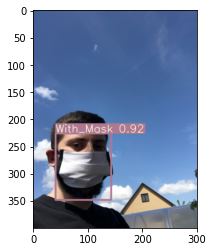

In [33]:
from glob import glob
import matplotlib.pyplot as plt
testfiles = glob('runs/detect/exp2/*')

img = plt.imread(testfiles[0]) 
plt.imshow(img)    
plt.show

In [35]:
!python detect.py --source /content/images/maksssksksss103.png --img-size 320 --conf 0.4 --weights weights/best.pt 

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=320, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='/content/images/maksssksksss103.png', update=False, view_img=False, weights=['weights/best.pt'])
Using torch 1.6.0 CPU

Fusing layers... 
Model Summary: 232 layers, 7251912 parameters, 0 gradients
image 1/1 /content/images/maksssksksss103.png: 256x320 4 With_Masks, Done. (0.150s)
Results saved to runs/detect/exp4
Done. (0.182s)


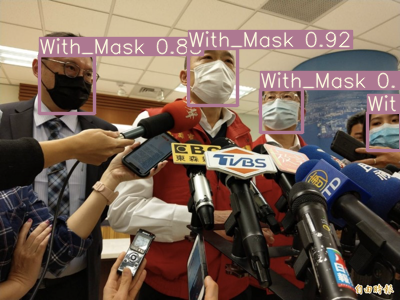

In [38]:
Image('runs/detect/exp2/maksssksksss103.png')

In [39]:
!python detect.py --source /content/images/maksssksksss130.png --img-size 320 --conf 0.4 --weights weights/best.pt 

Namespace(agnostic_nms=False, augment=False, classes=None, conf_thres=0.4, device='', exist_ok=False, img_size=320, iou_thres=0.45, name='exp', project='runs/detect', save_conf=False, save_txt=False, source='/content/images/maksssksksss130.png', update=False, view_img=False, weights=['weights/best.pt'])
Using torch 1.6.0 CPU

Fusing layers... 
Model Summary: 232 layers, 7251912 parameters, 0 gradients
image 1/1 /content/images/maksssksksss130.png: 320x288 4 Without_Masks, Done. (0.145s)
Results saved to runs/detect/exp5
Done. (0.180s)


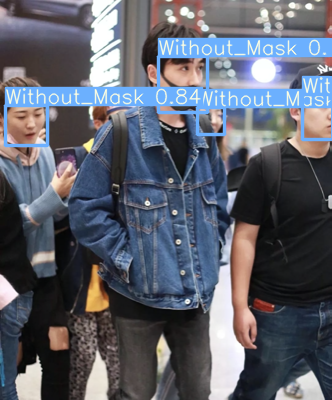

In [41]:
Image('runs/detect/exp5/maksssksksss130.png')